In [1]:
from matplotlib import pyplot as pl
import WiskiTools as wt
import saveload as sl
import numpy as np

In [15]:
# Search for a station, and output station names:
MyList=wt.searchStation('Piezo') #Old Jack Pine
#MyList=wt.searchStation('FEN') #Fen
#MyList=wt.searchStation('SD') #St. Dennis
# MyList=wt.searchStation('BWC') #BWC

http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getStationList&datasource=0&format=ascii
0 	 BERMS Piezometers
1 	 Brightwater Creek Piezometers


In [16]:
# Select one station from the list, by number:
station_name=MyList[0]
print(station_name)

BERMS Piezometers


In [17]:
# List all time series associated with this station:
MyTS=wt.searchTimeseries('',station_name)

No # 	 Timeseries 	 Parameter
0 	 109052042 	 BarometricPressure_Fen
1 	 99922042 	 BarometricPressure_OA
2 	 99900042 	 BarometricPressure_OJP
3 	 109062042 	 TotalHead_F1bp021
4 	 109060042 	 TotalHead_F2bp021
5 	 109072042 	 TotalHead_F2bp022
6 	 109074042 	 TotalHead_F3bp021
7 	 109066042 	 TotalHead_FNip022
8 	 109068042 	 TotalHead_FNip024
9 	 109070042 	 TotalHead_FOip031
10 	 109076042 	 TotalHead_FOrp033
11 	 109056042 	 TotalHead_FTbp101
12 	 109064042 	 TotalHead_FTmp041
13 	 109058042 	 TotalHead_FTpp081
14 	 109054042 	 TotalHead_FUpp023
15 	 109050042 	 TotalHead_OA
16 	 109034042 	 TotalHead_PH00
17 	 109036042 	 TotalHead_PH75
18 	 109038042 	 TotalHead_PH94
19 	 109040042 	 TotalHead_POJF
20 	 109042042 	 TotalHead_POJF2
21 	 109044042 	 TotalHead_POJP
22 	 109046042 	 TotalHead_POJR
23 	 109048042 	 TotalHead_POJT
24 	 99456042 	 WaterTableDepth_OBS
25 	 100224042 	 WaterTableElevation_F1bp021
26 	 100070042 	 WaterTableElevation_F2bp021
27 	 100432042 	 WaterTableEle

In [7]:
# Select one or more times series, by index
indexes=np.arange(21,33,2)
print(indexes)

# Select a data range to work with:
Start='2001-08-01 00:00:00'
End='2060-02-08 00:00:00'

# Extract data into a pandas dataframe:
TS_Selection=MyTS[indexes]
df = wt.getTimeseries(TS_Selection,station_name,Start,End)

[70 71]
2001-08-01 00:00:00
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=0&format=ascii&dateformat=yyyy-MM-dd%20HH:mm:ss&timezone=GMT-6&ts_id=55534042&returnfields=Timestamp,Value&from=2001-08-01 00:00:00&to=2060-02-08 00:00:00&
SoilVWC_005cm 85627
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=0&format=ascii&dateformat=yyyy-MM-dd%20HH:mm:ss&timezone=GMT-6&ts_id=55555042&returnfields=Timestamp,Value&from=2001-08-01 00:00:00&to=2060-02-08 00:00:00&
SoilVWC_020cm 85627


In [8]:
import saveload as sl



In [9]:
sl.save(df,'BWC_Example_soil')
print (df)

                     SoilVWC_005cm  SoilVWC_020cm
2013-07-05 15:30:00          0.242          0.406
2013-07-05 16:00:00          0.243          0.407
2013-07-05 16:30:00          0.238          0.407
2013-07-05 17:00:00          0.240          0.407
2013-07-05 17:30:00          0.239          0.407
2013-07-05 18:00:00          0.238          0.405
2013-07-05 18:30:00          0.237          0.405
2013-07-05 19:00:00          0.239          0.405
2013-07-05 19:30:00          0.239          0.405
2013-07-05 20:00:00          0.236          0.405
2013-07-05 20:30:00          0.237          0.405
2013-07-05 21:00:00          0.238          0.405
2013-07-05 21:30:00          0.235          0.405
2013-07-05 22:00:00          0.236          0.405
2013-07-05 22:30:00          0.233          0.407
2013-07-05 23:00:00          0.232          0.407
2013-07-05 23:30:00          0.236          0.399
2013-07-06 00:00:00          0.229          0.407
2013-07-06 00:30:00          0.233          0.398


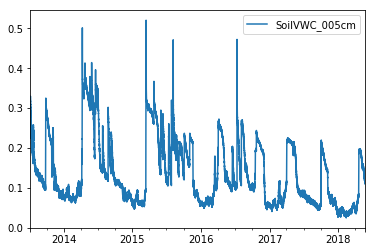

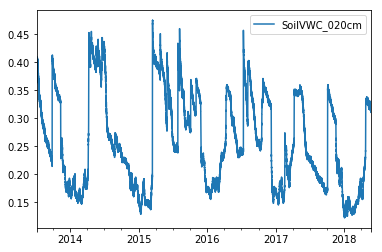

In [10]:
# Plot all the data in your dataframe on individual axes
for i in range(df.columns.size):
    df.plot(y=df.columns[i])
    
pl.show()